### Introduction to Machine Learning -- Decision Tree
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis

![](img/iris.png)

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

![](img/data.png)

NOTE: you can run this notebook in google colab if the graphviz is not installed

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

After loading the data, we separate out the attributes from the class labels. We put the attributes in X and the class labels in y. Note that we only use two attributes, i.e. column 2 and column 3. You can experiment with more attributes.

In [2]:
#type iris to see what is inside
X = iris.data[:, (2,3)]
y = iris.target
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

Alternatively, we can also import as a csv file using the **Panda** module. This reads the iris as a Panda dataframe. It is in a different format as above. The fields 
Sepal.Length;	Sepal.Width;	Petal.Length;	Petal.Width	Species


In [3]:
import pandas as pd
iris_df=pd.read_csv('iris.csv',sep=',',header=None)
iris_df.head()

,0,1,2,3,4,5,6
0,NaN,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,target
1,1.0,5.1,3.5,1.4,0.2,setosa,1
2,2.0,4.9,3,1.4,0.2,setosa,1
3,3.0,4.7,3.2,1.3,0.2,setosa,1
4,4.0,4.6,3.1,1.5,0.2,setosa,1


Convert to numpy array which is easier to work with. We separate out to input attributes and class target as earlier. Use two attributes (or all).

In [4]:
iris=np.array(iris_df)
X = iris[1:, [3,4]].astype(float)
y = iris[1:,6]


We randomly split the X and y arrays into 30 percent test data (45 samples) and 70 percent training data (105 samples).

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=7)
y_train

array(['1', '2', '2', '3', '1', '1', '1', '3', '1', '3', '2', '2', '2',
       '1', '1', '1', '2', '3', '2', '2', '1', '3', '1', '1', '3', '3',
       '1', '3', '1', '2', '3', '2', '1', '2', '1', '3', '3', '2', '1',
       '1', '2', '3', '1', '3', '3', '2', '1', '2', '1', '3', '3', '1',
       '1', '3', '2', '3', '3', '2', '1', '1', '3', '1', '1', '2', '3',
       '3', '2', '2', '1', '3', '1', '1', '2', '2', '3', '1', '2', '2',
       '3', '3', '2', '3', '1', '2', '2', '1', '1', '1', '2', '2', '1',
       '3', '3', '2', '3', '1', '3', '2', '2', '1', '3', '2', '3', '2',
       '1'], dtype=object)

We run the decision tree classfier using criterion=’entropy’. We can also use criterion=’gini’.

In [6]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)


Create the decision tree:

In [7]:
dtree=dtree.fit(X_train, y_train)


In [8]:
dtree.predict_proba(X_test[:10]) # show the first 10 predictions probability

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [9]:
dtree.predict(X_test[:10]) # predict class


array(['3', '2', '1', '2', '2', '1', '2', '2', '1', '2'], dtype=object)

To get the results and compare with expected results

In [12]:
y_pred =dtree.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
y_pred

Misclassified samples: 4


array(['3', '2', '1', '2', '2', '1', '2', '2', '1', '2', '3', '2', '1',
       '3', '1', '3', '3', '3', '1', '1', '2', '3', '2', '2', '3', '3',
       '2', '2', '3', '3', '3', '2', '1', '3', '2', '1', '1', '1', '1',
       '3', '3', '2', '3', '3', '2'], dtype=object)

In [11]:
y_test

array(['3', '2', '1', '2', '3', '1', '2', '2', '1', '2', '2', '2', '1',
       '3', '1', '2', '3', '3', '1', '1', '2', '3', '2', '3', '3', '3',
       '2', '2', '3', '3', '3', '2', '1', '3', '2', '1', '1', '1', '1',
       '3', '3', '2', '3', '3', '2'], dtype=object)

You can enter your own prediction test data:

In [13]:
dtree.predict([[3.5,2.5]])

array(['2'], dtype=object)

You can print the decision tree graph but it will require graphviz software (may or may not be installed). 

Graphviz create the image file that can be saved. 

If graphviz have not been install:
1. To install download exe at https://www2.graphviz.org/Packages/development/windows/10/cmake/Release/x64/
1a. Then select to include PATH for all users.
2. At the anaconda prompt type: pip install graphviz

If you can't install Graphviz, try to run in Google colab. See this link: https://colab.research.google.com/drive/1pHCsjOexZFAvUjIWfO4z9HtgHHnDwUBZ#scrollTo=HKIYHX0_dVRt

To view the link you need to use gapps.ntust.edu.tw account. Sign up with G-Suite for NTUST.

In [66]:
# Save tree as dot file
with open("iris.dot", 'w') as f:
     f = tree.export_graphviz(dtree, 
                              out_file=f)

Display it

In [ ]:
# To render an existing file in a notebook
from graphviz import Source
Source.from_file("iris.dot")

['Petal.Length' 'Petal.Width']
['1' '2' '3']


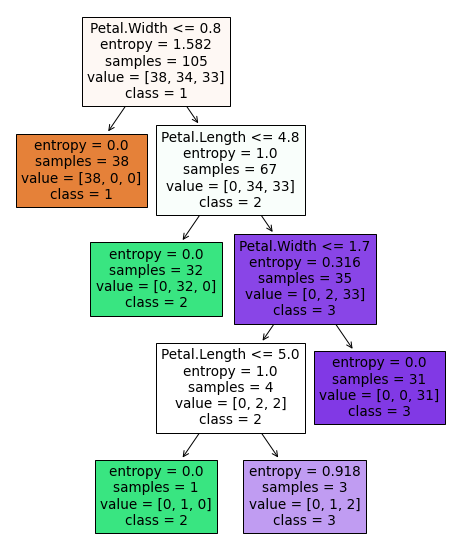

In [141]:
from matplotlib import pyplot as plt
print(iris[0,3:5])
print(y_train[15:18])

fig = plt.figure(figsize=(8,10))
_ = tree.plot_tree(dtree,feature_names=iris[0,3:5] , class_names=y_train[15:18],filled=True)

### Boundary surface map

We can also plot the decision surface. Note that we can only plot a decision surface for two attributes only. For 3 attributes we would need a 3D plot.

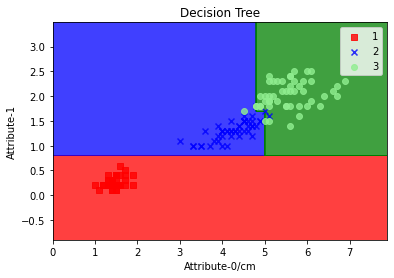

In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_ = np.vstack((X_train, X_test))
y_ = np.hstack((y_train, y_test))
markers = ('s', 'x', 'o', '^', 'v')

X1, X2 = np.meshgrid(np.arange(start = X_[:,0].min() - 1, stop = X_[:, 0].max() + 1, step = 0.01),  
                     np.arange(start = X_[:, 1].min() - 1, stop = X_[:, 1].max() + 1, step = 0.01))  
plt.contourf(X1, X2, dtree.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  
             alpha = 0.75, cmap = ListedColormap(('red', 'blue','green'))  )
plt.xlim(X1.min(), X1.max())  
plt.ylim(X2.min(), X2.max())  
for i, j in enumerate(np.unique(y)):  
    plt.scatter(X_[y_ == j, 0], X_[y_ == j, 1],  alpha=0.8,marker=markers[i],
                c = ['red','blue','lightgreen'][i], label = j)  
plt.title('Decision Tree')  
plt.xlabel('Attribute-0/cm')  
plt.ylabel('Attribute-1')  
plt.legend()  
plt.show()

### Question
1. Can you explain the decision tree diagram?
1. What does the boundary surface map show?
1. How is the boundary surface map related to the decision tree?
1. Rerun the train and test split with different random split (set random to different number each time). Does it change the classification tree?
1. How can you increase the accuracy of the decision tree with the given data?

### Answer  
1.Decision tree is a method of classifying different categories. Decision trees use entropy to classify. Entropy is used to measure the degree of chaos of information. The higher the entropy, the more chaotic the information.Therefore, as long as the entropy value of the node is 0, the classification of the branch will be stopped immediately  
中文：決策樹是一種對不同類別進行分類的方法。決策樹利用熵來分類。熵值是用來衡量資訊的混亂程度，熵值越高，表示資訊越混亂。因此只要節點的熵值為0就會馬上停止該分枝的分類。  
  
2.The boundary surface map shows the classification of this data in the decision tree. You can use a visual way to quickly understand the classification accuracy of this data and how effective the model is  
中文：邊界表面圖顯示了該數據在決策樹中的分類。可以通過直觀的方式快速了解這些數據的分類準確率以及模型的有效性  
　　
3.如圖  
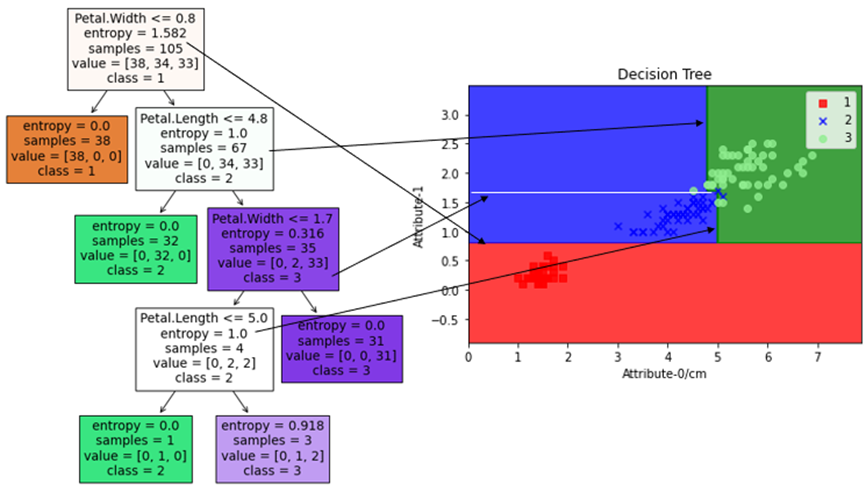
4.Using different random splits to split the training data and test data again will change the decision tree. Because it is equivalent to using different data to build a decision tree  
中文：使用不同的隨機拆分重新去拆分訓練資料和測試資料將會改變決策樹。因為等同於使用不同的資料去建決策樹  
5.The accuracy of classification can be increased by changing the "max_depth" of the decision tree. For example, the original max_depth is 4, you can try to set it to 6, which will improve his accuracy
中文：可以藉由改變決策樹的“max_depth”來增加分類的準確性。例如原本max_depth是4，可以試著將他設定為6，這會改善他的準確度

In [145]:
#Q4
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split( X, y, test_size=0.2, random_state=8)

from sklearn import tree
dtree2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

dtree2= dtree.fit(X_train2, y_train2)

print(dtree2.predict_proba(X_test[:10])) # show the first 10 predictions probability
print(dtree2.predict(X_test[:10])) # predict class

y_pred2 =dtree.predict(X_test2)
print('Misclassified samples: %d' % (y_test2 != y_pred2).sum())

dtree2.predict([[3.5,2.5]])

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
['3' '2' '1' '2' '2' '1' '2' '2' '1' '2']
Misclassified samples: 4


array(['3'], dtype=object)

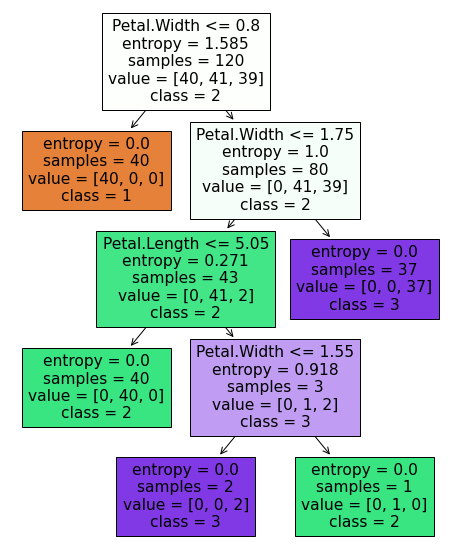

In [146]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8,10))
_ = tree.plot_tree(dtree2,feature_names=iris[0,3:5],class_names=y_train[15:18],filled=True)